## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

0. Import the data and we get the data url and the csv file, then using pandas for further analysis

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [24]:
import pandas as pd

# URL of the dataset
data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'

# Load the dataset
ckd_data = pd.read_csv(data_url)

file_path = r'C:\\Users\\15984\\learning\\stats3da3\\HW6\\chronic_kidney_disease.csv'

ckd_data.to_csv(file_path, index=False)
print(f"CSV file has been saved at {file_path}")




CSV file has been saved at C:\\Users\\15984\\learning\\stats3da3\\HW6\\chronic_kidney_disease.csv


1. In This project We will use the decision tree and the SVC model to predict the patient has the ckd or not based on those 400 instances provide by the . The source is Rubini,L., Soundarapandian,P., and Eswaran,P.. (2015). Chronic Kidney Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C5G020.  

2. The dataset has been labelled correctly AND claerly. I think we dont need any further transformation

3. 
Make an overview of the dataset  
Total Observations: 400
Variables: 25 (24 features and 1 target variable class)
Data Types:
Numerical: 11 variables including age, blood pressure, blood glucose random, blood urea, serum creatinine, sodium, potassium, hemoglobin, packed cell volume, white blood cell count, and red blood cell count.
Nominal: 14 variables including specific gravity, albumin, sugar, red blood cells, pus cell, pus cell clumps, bacteria, hypertension, diabetes mellitus, coronary artery disease, appetite, pedal edema, anemia, and class (target variable).
Age: Age of the patient in years.
Blood Pressure (bp): Blood pressure in mm/Hg.
Specific Gravity (sg): Categorized into five levels (1.005, 1.010, 1.015, 1.020, 1.025).
Albumin (al) and Sugar (su): Both rated on a scale from 0 to 5.
Blood Glucose Random (bgr): Blood glucose levels in mg/dl.
Blood Urea (bu) and Serum Creatinine (sc): Measures of kidney function, noted in mg/dl and mg/dl, respectively.
Sodium (sod) and Potassium (pot): Electrolyte levels in mEq/L.
Class Distribution
Chronic Kidney Disease (ckd): 250 instances
Not Chronic Kidney Disease (notckd): 150 instances

4.
High Correlations: Certain variables such as bgr (blood glucose random) and su (sugar) show notable positive correlations, suggesting they might convey similar information regarding blood sugar levels. This redundancy could lead us to select only one of these features for model simplicity and to avoid multicollinearity.

Influence of Kidney Function Tests: Variables like bu (blood urea) and sc (serum creatinine) are highly correlated with each other and also significantly related to the class variable. This indicates their strong predictive power for CKD and suggests that they are essential features for any predictive modeling.

Interactions with Demographic Features: Age and blood pressure (age and bp) show moderate correlations with other clinical measures, which may imply that these demographic factors influence or interact with other clinical symptoms of CKD. This can be leveraged in feature engineering by creating interaction terms or by specifically focusing on these demographics in subgroup analyses.

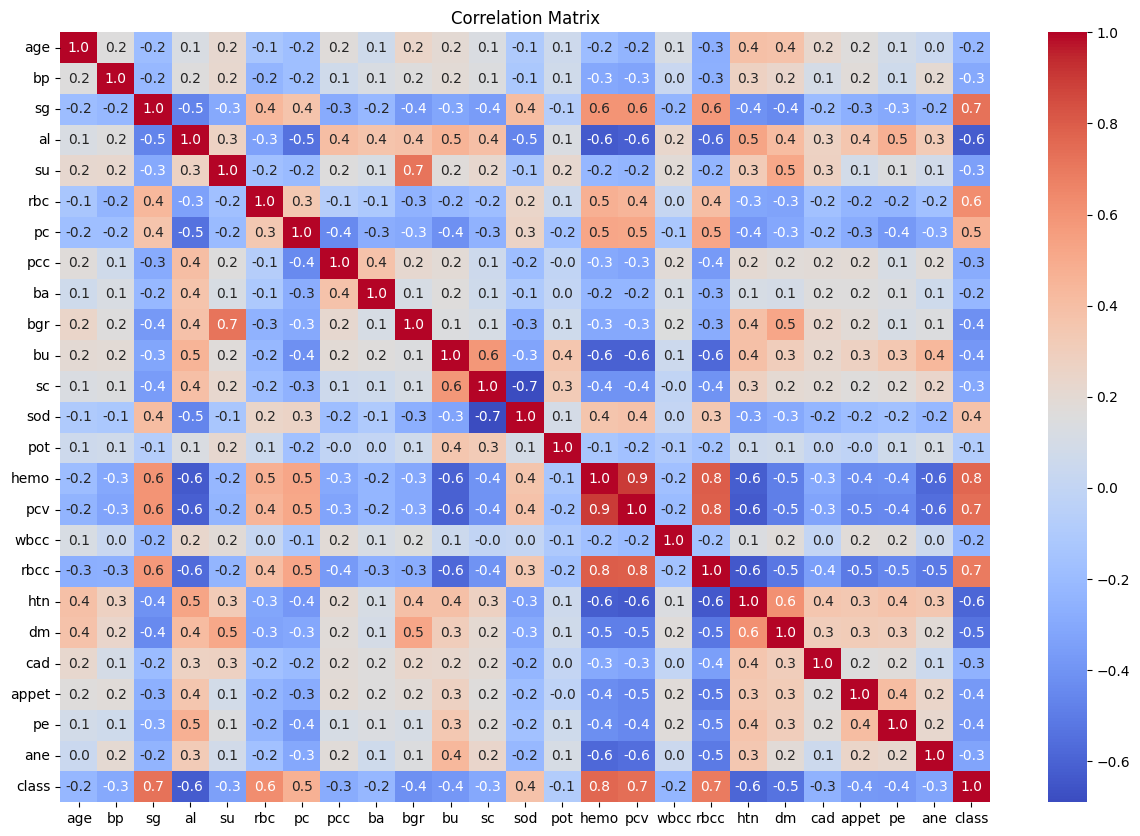

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode nominal data to prepare for correlation analysis
label_encoders = {}
for column in ckd_data.columns:
    if ckd_data[column].dtype == 'object':
        le = LabelEncoder()
        # Fit and transform the data to handle NaN by converting to string type
        ckd_data[column] = le.fit_transform(ckd_data[column].astype(str))
        label_encoders[column] = le

# Correlation matrix of the dataset
correlation_matrix = ckd_data.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


5. Missing value part

In [10]:
# Calculate the number and percentage of missing values per feature
missing_data = ckd_data.replace('?', pd.NA).isna().sum()
missing_percentage = (missing_data / len(ckd_data)) * 100

# Create a dataframe to display the missing data analysis
missing_df = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage": missing_percentage
})

missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)


,Missing Values,Percentage
rbcc,131,32.75
wbcc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
hemo,52,13.00
su,49,12.25
sg,47,11.75
al,46,11.50
bgr,44,11.00


High Missing Values (Greater than 20% Missing):

rbcc (Red Blood Cell Count): 32.75%
wbcc (White Blood Cell Count): 26.50%
pot (Potassium): 22.00%
sod (Sodium): 21.75%
For these variables, considering their clinical significance in diagnosing CKD, imputation might be considered if removing them could lead to a loss of valuable information. Advanced imputation techniques such as multivariate imputation or k-Nearest Neighbors could be utilized instead of simpler methods like mean or median to preserve relationships in the data.

Moderate Missing Values (10% to 20% Missing):

pcv (Packed Cell Volume)
hemo (Hemoglobin)
su (Sugar)
sg (Specific Gravity)
al (Albumin)
bgr (Blood Glucose Random)
These can be imputed using median or mode for categorical data and median for numerical data to handle outliers effectively.

Low Missing Values (Less than 10% Missing):

bu (Blood Urea)
sc (Serum Creatinine)
bp (Blood Pressure)
age
These can be safely imputed with median values for numerical data, as the low percentage of missing values is unlikely to bias the dataset significantly.

6. outlier analysis

c:\Users\15984\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\15984\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\15984\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\15984\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

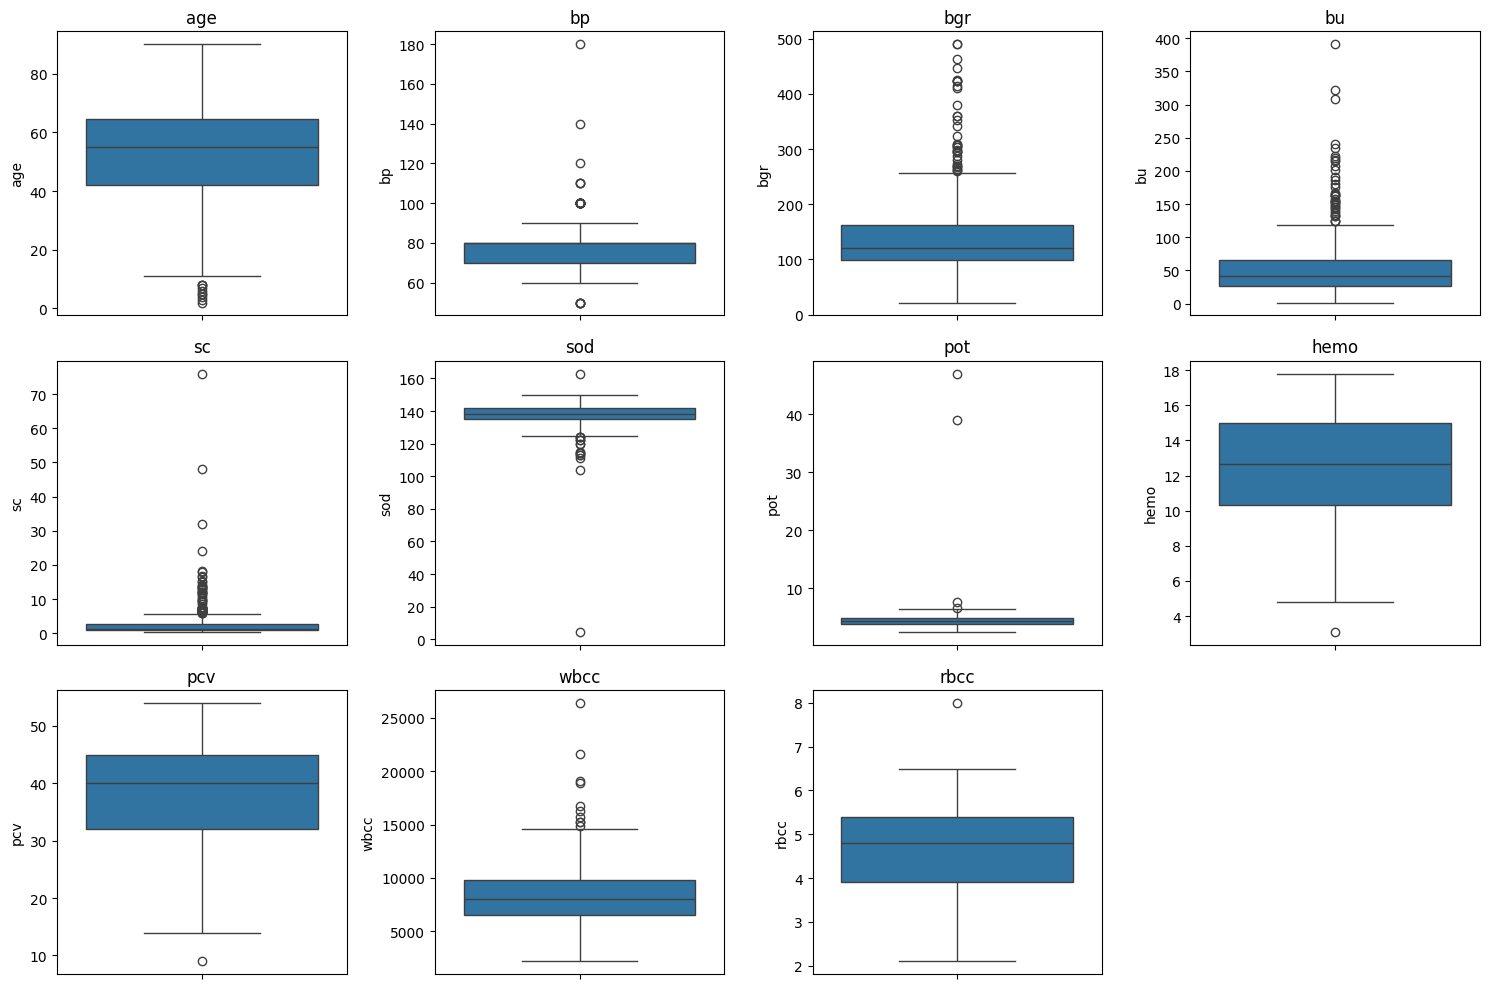

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

key_numerical_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numerical_vars):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=ckd_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Age (age): There are no visible outliers. The distribution seems to be left-skewed, with most values clustering around the middle age range.

Blood Pressure (bp): Several points lie outside the upper whisker, indicating high blood pressure readings that are outliers. High blood pressure is a known risk factor for CKD, so these outliers could represent actual clinical scenarios.

Blood Glucose Random (bgr): There's a substantial number of points beyond the upper whisker, suggesting high blood glucose readings. These could be significant, especially since diabetes is a leading cause of CKD.

Blood Urea (bu): A few points are above the upper whisker, indicating higher levels of urea, which could be clinically relevant as they may indicate reduced kidney function.

Serum Creatinine (sc): There are several outliers above the upper whisker, which may be significant since serum creatinine is an important indicator of kidney health.

Sodium (sod): Multiple points lie outside both the lower and upper whiskers, suggesting some patients have abnormal sodium levels, which can be related to kidney function.

Potassium (pot): There are outliers on the upper side, indicating high potassium levels that could be related to kidney function as well.

Hemoglobin (hemo): There are a few outliers on the lower side, suggesting some patients have low hemoglobin levels, a common symptom of CKD.

Packed Cell Volume (pcv): Similar to hemoglobin, there are outliers on the lower side, which might be an indication of anemia associated with CKD.

White Blood Cell Count (wbcc): There are several outliers above the upper whisker, which might indicate infections or other medical conditions.

Red Blood Cell Count (rbcc): Outliers are present on both lower and upper sides. Low rbcc can be a sign of anemia in CKD, while high counts may be less common in CKD unless there are other contributing factors.

7. subgroup analysis


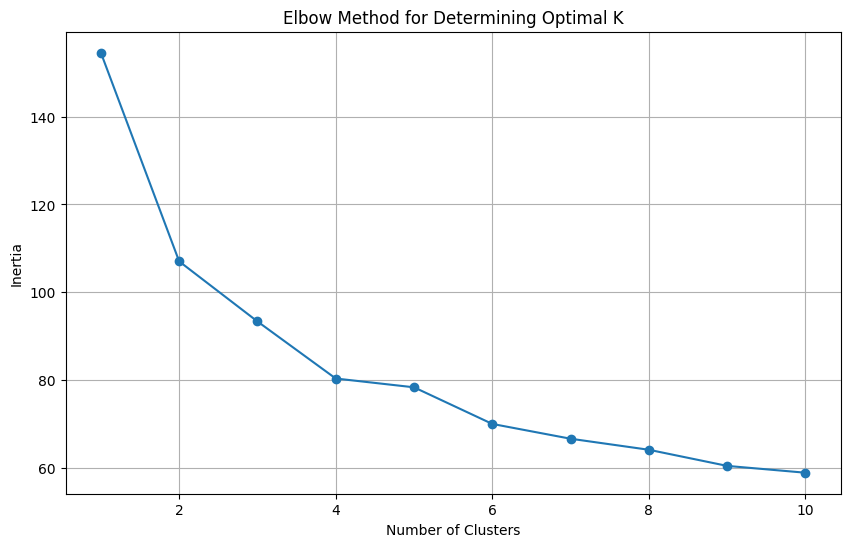

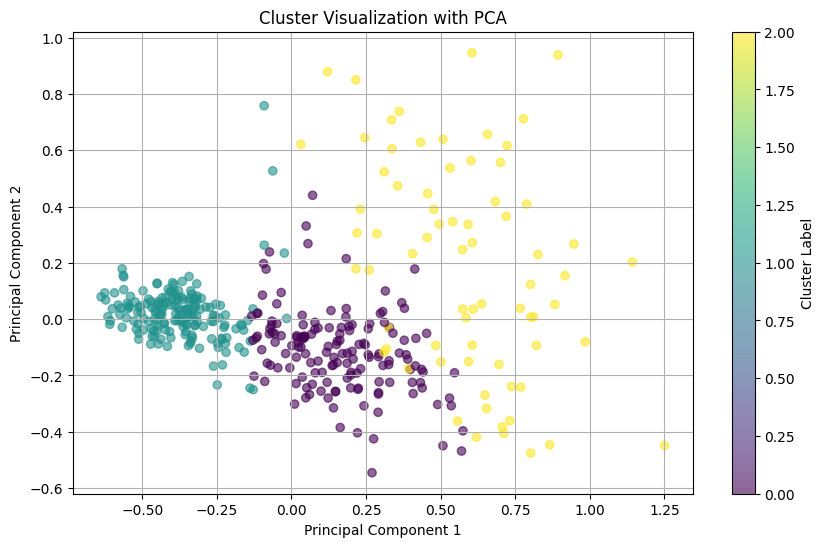

In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Separate features and target, remove 'class' column for clustering
X = ckd_data.drop('class', axis=1)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64']).columns

# Create pipelines for numerical and categorical data preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a full preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Apply the preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Plot the inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Determining Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Clustering with optimal K (found to be 3 from the plot)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_processed)

# PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_processed)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()



8 - 11 Classifier  A Decsision tree

C:\Users\15984\AppData\Local\Temp\ipykernel_18824\983457665.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ckd_data[column].fillna(ckd_data[column].median(), inplace=True)
C:\Users\15984\AppData\Local\Temp\ipykernel_18824\983457665.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Unique classes from LabelEncoder: ['ckd' 'ckd\t' 'notckd']


c:\Users\15984\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


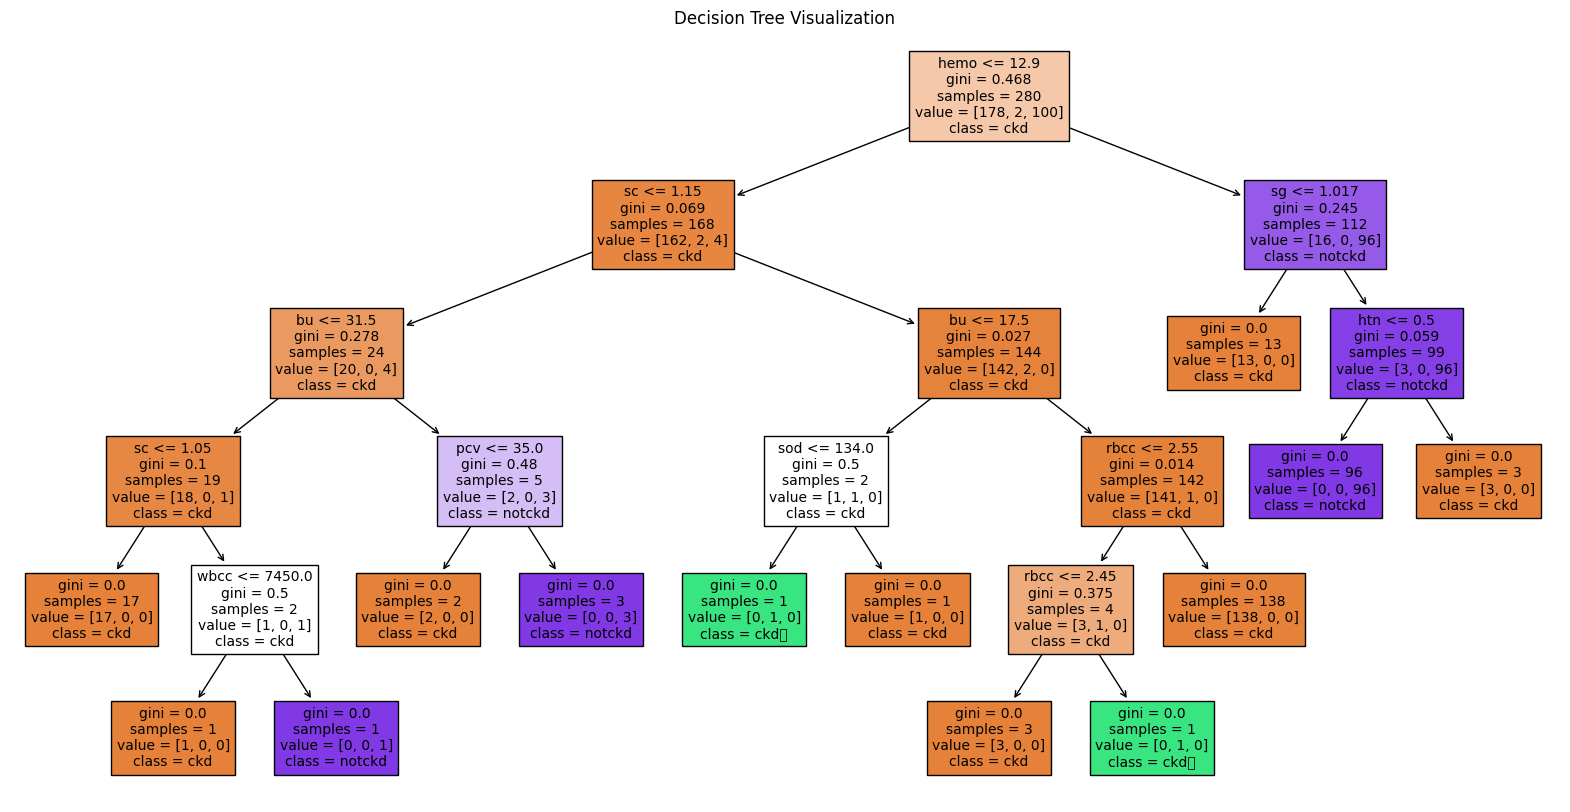

(0.95,
 {'0': {'precision': 0.9705882352941176,
   'recall': 0.9428571428571428,
   'f1-score': 0.9565217391304348,
   'support': 70.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0},
  '2': {'precision': 0.9411764705882353,
   'recall': 0.96,
   'f1-score': 0.9504950495049505,
   'support': 50.0},
  'accuracy': 0.95,
  'macro avg': {'precision': 0.6372549019607843,
   'recall': 0.6342857142857142,
   'f1-score': 0.6356722628784618,
   'support': 120.0},
  'weighted avg': {'precision': 0.9583333333333334,
   'recall': 0.95,
   'f1-score': 0.9540106184531497,
   'support': 120.0}},
 array([0.        , 0.        , 0.16482101, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02540119, 0.01487475, 0.00762693, 0.        , 0.7018232 ,
        0.01830464, 0.00762693, 0.01514645, 0.04437489, 0.        ,
        0.        , 0.        , 0.        , 0.        ]))

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree for visualization
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\Users\\15984\\learning\\stats3da3\\HW6\\chronic_kidney_disease.csv'
ckd_data = pd.read_csv(file_path)

# Fill missing values for numerical columns with median
for column in ckd_data.select_dtypes(include='number').columns:
    ckd_data[column].fillna(ckd_data[column].median(), inplace=True)

# Fill missing values for categorical columns with mode
for column in ckd_data.select_dtypes(include='object').columns:
    ckd_data[column].fillna(ckd_data[column].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ckd_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    ckd_data[column] = le.fit_transform(ckd_data[column])
    label_encoders[column] = le

# Split the dataset into training and testing sets
X = ckd_data.drop('class', axis=1)
y = ckd_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Print unique classes from the target column after encoding
unique_classes = label_encoders['class'].classes_
print("Unique classes from LabelEncoder:", unique_classes)

# Adjust plot_tree call to match the actual classes
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=unique_classes, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


(accuracy, classification_rep, feature_importances)



(0.95,
 {'0': {'precision': 0.9705882352941176,
   'recall': 0.9428571428571428,
   'f1-score': 0.9565217391304348,
   'support': 70.0}

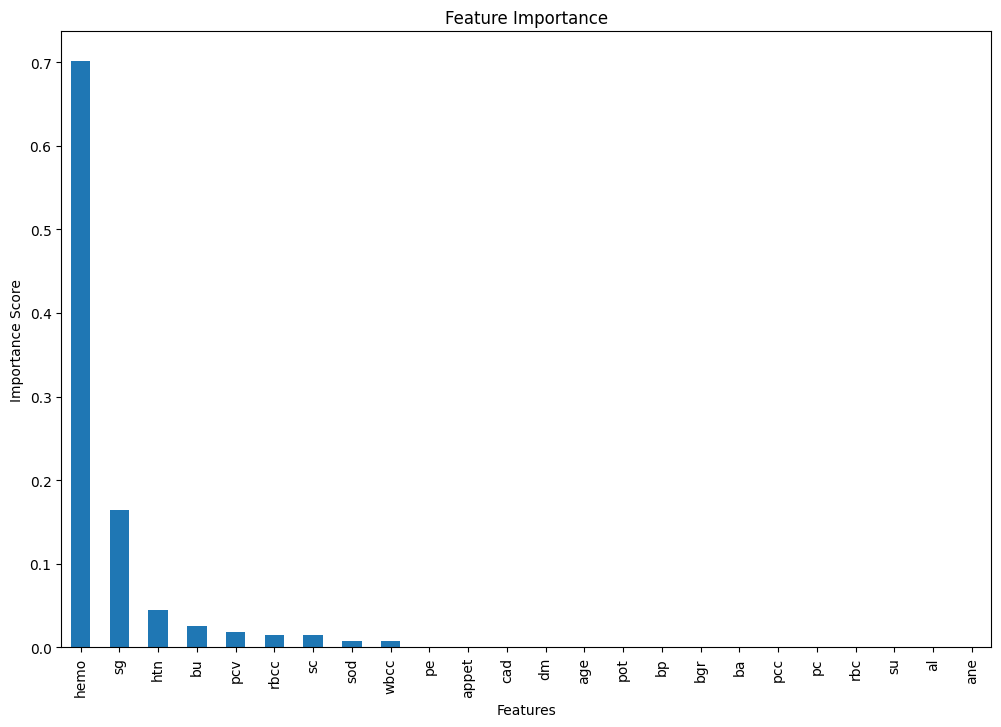

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dt_classifier is your trained Decision Tree model and X_train contains your feature data
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X_train.columns)

# Plotting feature importances
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


8 - 11 Classifier B  Support vector classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'C:\\Users\\15984\\learning\\stats3da3\\HW6\\chronic_kidney_disease.csv'
ckd_data = pd.read_csv(file_path)

# Fill missing values for numerical columns with median
for column in ckd_data.select_dtypes(include='number').columns:
    ckd_data[column].fillna(ckd_data[column].median(), inplace=True)

# Fill missing values for categorical columns with mode
for column in ckd_data.select_dtypes(include='object').columns:
    ckd_data[column].fillna(ckd_data[column].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ckd_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    ckd_data[column] = le.fit_transform(ckd_data[column])
    label_encoders[column] = le

# Split the dataset into training and testing sets
X = ckd_data.drop('class', axis=1)
y = ckd_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Train a Support Vector Classifier
svm_classifier = SVC(kernel='linear')  # Using a linear kernel
svm_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


11. Improvment on the decision tree we shall use the  Recursive Feature Elimination to make a feature selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'C:\\Users\\15984\\learning\\stats3da3\\HW6\\chronic_kidney_disease.csv'
ckd_data = pd.read_csv(file_path)

# Fill missing values for numerical columns with median
for column in ckd_data.select_dtypes(include='number').columns:
    ckd_data[column].fillna(ckd_data[column].median(), inplace=True)

# Fill missing values for categorical columns with mode
for column in ckd_data.select_dtypes(include='object').columns:
    ckd_data[column].fillna(ckd_data[column].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ckd_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    ckd_data[column] = le.fit_transform(ckd_data[column])
    label_encoders[column] = le

# Split the dataset into training and testing sets
X = ckd_data.drop('class', axis=1)
y = ckd_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Train a Decision Tree Classifier to evaluate feature importances
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Feature Importance from Decision Tree
model = SelectFromModel(dt_classifier, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

# Train and evaluate with selected features
dt_classifier.fit(X_train_new, y_train)
y_pred = dt_classifier.predict(X_test_new)
print("Decision Tree with Feature Importance Selection:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Recursive Feature Elimination
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)  # Selecting top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

dt_classifier.fit(X_train_rfe, y_train)
y_pred_rfe = dt_classifier.predict(X_test_rfe)
print("Decision Tree with Recursive Feature Elimination:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rfe)}')
print(classification_report(y_test, y_pred_rfe))


12 Comparision 

Accuracy and F1 score:
Decision Tree (Original): Achieved an accuracy of 97.8%. After feature selection:
Feature Importance Selection: Improved to 98.3%.
Recursive Feature Elimination (RFE): Dropped slightly to 95%.
SVC: Achieved a slightly lower accuracy of 92.5%.

Feature Importance Selection clearly improved the Decision Tree's performance, making it the best model among those tested with high accuracy and balanced precision/recall.
SVC shows robust performance, especially for class 2, but its recall for class 0 needs improvement. It might benefit from parameter tuning or trying different kernels like rbf or poly to handle potential non-linear relationships better.
Recursive Feature Elimination didn't enhance the Decision Tree as much as Feature Importance Selection. This suggests that while RFE can be powerful, the recursive elimination process might have removed some features that were useful for achieving the highest accuracy.

13 Insight

Insights from the Decision Tree
Critical Predictors: The top features in the importance chart are vital for predicting CKD. These might include clinical measurements like serum creatinine or hemoglobin levels, which are known to be significant indicators of kidney function.
Decision Paths: The visualization shows how different values of these critical features lead to a diagnosis of CKD or not. For example, a high serum creatinine level might lead directly to a CKD prediction.
Overfitting Check: Despite the high accuracy, it's essential to be cautious of overfitting, especially if the tree depth is significant. Overfitting can make the model less generalizable to new data. Applying techniques like pruning the tree or limiting its depth might help if overfitting is suspected.

We can find that in a small dataset, the tranditional model decision trees are really useful and have a claer visulization 

15 Me only

16 link

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
